<a href="https://colab.research.google.com/github/pajochain/NGSTrioAnalysis/blob/main/Lab1NGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## MOM
!gdown 1I-G7G0PbwwDMptu7b9XWZmptAqVrhAHg
!mv analysis-ready-snps-filteredGT-functotated.vcf mother.vcf

## DAD
!gdown 18i8CtU0Dn84QxPyEGnXhYpCbKRjXjr6a
!mv analysis-ready-snps-filteredGT-functotated.vcf father.vcf

## SON
!gdown 1S-NuSvNzDnTiL8RzGaIfAxL0SU-0CyKv
!mv analysis-ready-snps-filteredGT-functotated.vcf son.vcf


Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1I-G7G0PbwwDMptu7b9XWZmptAqVrhAHg

but Gdown can't. Please check connections and permissions.
mv: cannot stat 'analysis-ready-snps-filteredGT-functotated.vcf': No such file or directory
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=18i8CtU0Dn84QxPyEGnXhYpCbKRjXjr6a

but Gdown can't. Please check connections and permissions.
mv: cannot stat 'analysis-ready-snps-filteredGT-functotated.vcf': No such file or directory
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the 

In [ ]:
### Do you remember this parser?
### CHEATSHEET: Genotypes 0,1,2,3==HOM_REF, HET, UNKNOWN, HOM_ALT
!pip install cyvcf2
### This will help us work the venn digram
#### This is the documentation        https://pypi.org/project/matplotlib-venn/
!pip install matplotlib matplotlib-venn

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_i

In [ ]:
####Imports my personal notebook to bypass download issues if there are any.
from google.colab import drive
drive.mount('/content/drive')

#RUN ONLY IF NECESSARY
#copies necessary files from personal drive
!cp 'drive/Othercomputers/My Laptop/Google Collab Files/father.vcf' .
!cp 'drive/Othercomputers/My Laptop/Google Collab Files/mother.vcf' .
!cp 'drive/Othercomputers/My Laptop/Google Collab Files/son.vcf' .

KeyboardInterrupt: 

In [ ]:
###Total variants identified is the number of lines
!cat son.vcf | grep '^chr'| wc
!cat father.vcf | grep '^chr'| wc
!cat mother.vcf | grep '^chr'| wc

grep: (standard input): binary file matches
3631004 36310040 1593663489
grep: (standard input): binary file matches
3502610 35026100 1535903048
grep: (standard input): binary file matches
3666157 36661570 1608982622


In [ ]:
import pandas
import matplotlib.pyplot as plt
import cyvcf2

In [ ]:
family = ("father", "mother", "son")
for member in family:
  vcf_reader = cyvcf2.VCF(f'{member}.vcf')

  with open(f'{member}.tsv', 'w') as file:
      for variant in vcf_reader:
          genotype = variant.gt_types[0]
          data_string = f"{variant.CHROM}\t{variant.POS}\t{variant.ID}\t{variant.REF}\t{','.join(variant.ALT)}\t{variant.QUAL}\t{variant.INFO.get('DP')}\t{variant.FILTER}\t{genotype}\n"
          file.write(data_string)

In [ ]:
columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'DP', 'FILTER', 'GENOTYPE']

mother_df = pandas.read_csv("mother.tsv", sep = "\t", header=None, names= columns )
father_df = pandas.read_csv("father.tsv", sep = "\t", header=None, names= columns )
son_df = pandas.read_csv("son.tsv", sep = "\t", header=None, names= columns )


In [ ]:
#Fills ID column with values from CHROM and POS columns
father_df['ID'] = father_df['CHROM'].astype(str) + ':'+ father_df['POS'].astype(str)
mother_df['ID'] = mother_df['CHROM'].astype(str) + ':' + mother_df['POS'].astype(str)
son_df['ID'] = son_df['CHROM'].astype(str) + ':'+ son_df['POS'].astype(str)

In [ ]:
hmz_father = father_df[father_df['GENOTYPE'] == 3]['ID'].tolist()
hmz_son = son_df[son_df['GENOTYPE'] == 3]['ID'].tolist()
hmz_mother = mother_df[mother_df['GENOTYPE'] == 3]['ID'].tolist()

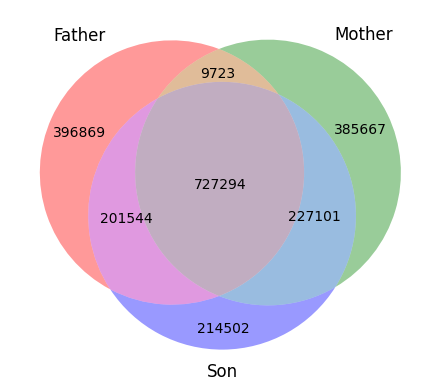

In [ ]:
##### Venn diagram:
from matplotlib_venn import venn3

## Question for students: what is the difference between a set and a list?

# List the elements
set1 = set(hmz_father)
set2 = set(hmz_son)
set3 = set(hmz_mother)

# Create the Venn diagram for 3 sets
venn3([set1, set3, set2], ('Father', 'Mother', 'Son'))


In [ ]:
#Annotations
!grep '^chr' son.vcf | awk '{print $1":"$2"\t"$8}' | sed 's/FUNCOTATION=\[/\t/g' | sed 's/|/\t/g' | awk '{print $1"\t"$3"\t"$8}' > son_annotation.tsv
!grep '^chr' father.vcf | awk '{print $1":"$2"\t"$8}' | sed 's/FUNCOTATION=\[/\t/g' | sed 's/|/\t/g' | awk '{print $1"\t"$3"\t"$8}' > father_annotation.tsv
!grep '^chr' mother.vcf | awk '{print $1":"$2"\t"$8}' | sed 's/FUNCOTATION=\[/\t/g' | sed 's/|/\t/g' | awk '{print $1"\t"$3"\t"$8}' > mother_annotation.tsv

In [ ]:
#Creates new data frames with annotations
columns_annotation = ['ID', 'HUGO', 'CLASSIFICATION']

mother_annotation_df = pandas.read_csv('mother_annotation.tsv', delimiter = '\t', header=None, names= columns_annotation)
father_annotation_df = pandas.read_csv('father_annotation.tsv', delimiter = '\t', header=None, names= columns_annotation)
son_annotation_df = pandas.read_csv('son_annotation.tsv', delimiter = '\t', header=None, names= columns_annotation)

In [ ]:
### This merges both the annotation and variants into a single DF

mother_final_df = pandas.merge(mother_df, mother_annotation_df, on='ID', how='left')
father_final_df = pandas.merge(father_df, father_annotation_df, on='ID', how='left')
son_final_df = pandas.merge(son_df, son_annotation_df, on='ID', how='left')

In [ ]:
######## DOWNLOAD THIS ONLY IF YOU DIDNT DO PREVIOUS STEPS

## USE the links below to download your set of genomes
# gt_types is array of 0,1,2,3==HOM_REF, HET, UNKNOWN, HOM_ALT
### TABLE 1
!gdown 1YKCtSkD4HBHI7xQsnM68xSwKidDYPlQQ
!unzip Annotated3.zip

### TABLE 2
#!gdown 1W4z9TTu7AS1FDzJWvD9Le9GAgJjduZ-g
#!unzip Annotated2.zip

### TABLE 3
#!gdown 1bwgkRyT2w0Tou_U-DMuMAq5f0MlRi3ht
#!unzip Annotated1.zip


####YOU MAY NEED TO RENAME THE DOWNLOADED FILES



Downloading...
From (original): https://drive.google.com/uc?id=1YKCtSkD4HBHI7xQsnM68xSwKidDYPlQQ
From (redirected): https://drive.google.com/uc?id=1YKCtSkD4HBHI7xQsnM68xSwKidDYPlQQ&confirm=t&uuid=fe49b932-5486-493d-8d9a-6c4310e796b6
To: /content/Annotated3.zip
100% 134M/134M [00:02<00:00, 53.2MB/s]
Archive:  Annotated3.zip
   creating: Annotated/
  inflating: Annotated/mother_final.tsv  
  inflating: __MACOSX/Annotated/._mother_final.tsv  
  inflating: Annotated/father_final.tsv  
  inflating: __MACOSX/Annotated/._father_final.tsv  
  inflating: Annotated/README.txt    
  inflating: __MACOSX/Annotated/._README.txt  
  inflating: Annotated/son_final.tsv  
  inflating: __MACOSX/Annotated/._son_final.tsv  


In [ ]:
#ONLY RUN IF YOU DOWNLOADED FROM ABOVE CELL
mother_final_df = pandas.read_csv('Annotated/mother_final.tsv', delimiter = '\t')
son_final_df = pandas.read_csv('Annotated/son_final.tsv', delimiter = '\t')
father_final_df = pandas.read_csv('Annotated/father_final.tsv', delimiter = '\t')

In [ ]:
###Converts annotated dataframes to .csv files

###To save the dataframes into csv
# mother_final_df.to_csv('mother_out.csv', index=False)
# father_final_df.to_csv('father_out.csv', index=False)
# son_final_df.to_csv('son_out.csv', index=False)
##Download them from the "table of contents" if necessary.


###Reads the downloaded .csv files.
##YOU CAN CONSIDER THIS A CHECKPOINT
# father_final_df = pandas.read_csv('father_out.csv', header=0)
# mother_final_df = pandas.read_csv('mother_out.csv', header=0)
# son_final_df = pandas.read_csv('son_out.csv', header=0)

In [ ]:
!awk '{print $3}' son_annotation.tsv | sort | uniq -c
!awk '{print $3}' father_annotation.tsv | sort | uniq -c
!awk '{print $3}' mother_annotation.tsv | sort | uniq -c

awk: cannot open Annotated/son_annotation.tsv (No such file or directory)
awk: cannot open Annotated/father_annotation.tsv (No such file or directory)
awk: cannot open Annotated/mother_annotation.tsv (No such file or directory)


In [ ]:
###To save the dataframes into csv
# mother_final_df.to_csv('mother_out.csv', index=False)
# father_final_df.to_csv('father_out.csv', index=False)
# son_final_df.to_csv('son_out.csv', index=False)

#Get output csvs
# !cp 'drive/Othercomputers/My Laptop/Google Collab Files/father_out.csv' .
# !cp 'drive/Othercomputers/My Laptop/Google Collab Files/mother_out.csv' .
# !cp 'drive/Othercomputers/My Laptop/Google Collab Files/son_out.csv' .

# # columns = ['CHROM', 'POS','REF', 'ALT', 'QUAL', 'DP', 'FILTER', 'GENOTYPE', 'HUGO', 'CLASSIFICATION']
# father_final_df = pandas.read_csv('father_out.csv', header=0)
# mother_final_df = pandas.read_csv('mother_out.csv', header=0)
# son_final_df = pandas.read_csv('son_out.csv', header=0)

In [ ]:
son_final_df['CLASSIFICATION'].value_counts()

IGR                        1525709
INTRON                     1290609
RNA                         568237
FIVE_PRIME_FLANK            186485
THREE_PRIME_UTR              31081
SILENT                       10589
MISSENSE                      9621
FIVE_PRIME_UTR                5874
COULD_NOT_DETERMINE           1732
SPLICE_SITE                    878
NONSENSE                        77
DE_NOVO_START_OUT_FRAME         62
DE_NOVO_START_IN_FRAME          27
NONSTOP                         16
START_CODON_SNP                  7
Name: CLASSIFICATION, dtype: int64

In [ ]:
mother_final_df['CLASSIFICATION'].value_counts()

IGR                        1550812
INTRON                     1295871
RNA                         571007
FIVE_PRIME_FLANK            187859
THREE_PRIME_UTR              31478
SILENT                       10734
MISSENSE                      9682
FIVE_PRIME_UTR                5874
COULD_NOT_DETERMINE           1708
SPLICE_SITE                    920
NONSENSE                        90
DE_NOVO_START_OUT_FRAME         76
DE_NOVO_START_IN_FRAME          25
NONSTOP                         13
START_CODON_SNP                  8
Name: CLASSIFICATION, dtype: int64

In [ ]:
father_final_df['CLASSIFICATION'].value_counts()

IGR                        1466065
INTRON                     1250060
RNA                         548878
FIVE_PRIME_FLANK            179662
THREE_PRIME_UTR              30325
SILENT                       10320
MISSENSE                      9314
FIVE_PRIME_UTR                5605
COULD_NOT_DETERMINE           1327
SPLICE_SITE                    865
NONSENSE                        80
DE_NOVO_START_OUT_FRAME         63
DE_NOVO_START_IN_FRAME          24
NONSTOP                         14
START_CODON_SNP                  8
Name: CLASSIFICATION, dtype: int64

In [ ]:
# gt_types is array of 0,1,2,3==HOM_REF, HET, UNKNOWN, HOM_ALT
##Updates the mother and father dataframes to only have mutations that they are heterozygous for
mother_final_df = mother_final_df[mother_final_df['GENOTYPE'] == 1]
father_final_df = father_final_df[father_final_df['GENOTYPE'] == 1]

In [ ]:
#Filters mutations in son that are homozygous mutations
##Add mutations of interes here as a list of strings
##Example: MUTATION_TYPES = ['MISSENSE', 'NONSENSE']

MUTATION_TYPES = ['MISSENSE', 'NONSENSE']



son_p_df = pandas.DataFrame()
son_p_df = son_final_df[son_final_df['CLASSIFICATION'].isin(MUTATION_TYPES) \
                        & (son_final_df['GENOTYPE'] == 3)
                        ]
son_p_df

,CHROM,POS,ID,REF,ALT,QUAL,DP,FILTER,GENOTYPE,HUGO,CLASSIFICATION
391,chr1,942451,chr1:942451,T,C,375.059998,15,None,3,SAMD11,MISSENSE
412,chr1,953279,chr1:953279,T,C,1264.060059,44,None,3,NOC2L,MISSENSE
451,chr1,973858,chr1:973858,G,C,649.059998,20,None,3,PLEKHN1,MISSENSE
456,chr1,976215,chr1:976215,A,G,636.059998,22,None,3,PERM1,MISSENSE
459,chr1,978953,chr1:978953,C,G,908.059998,29,None,3,PERM1,MISSENSE
...,...,...,...,...,...,...,...,...,...,...,...
3620929,chrX,154930010,chrX:154930010,G,C,384.059998,13,None,3,F8,MISSENSE
3621588,chrY,5100327,chrY:5100327,G,T,398.059998,14,None,3,PCDH11Y,MISSENSE
3621589,chrY,5100614,chrY:5100614,T,G,455.059998,16,None,3,PCDH11Y,MISSENSE
3621766,chrY,7064065,chrY:7064065,A,T,330.059998,11,None,3,TBL1Y,MISSENSE


In [ ]:
##THIS PICKS DE NOVO MUTATIONS
#TODO: change matching mutations.
#This is where you can find your gene of interest

denovo_df = son_p_df[~(son_final_df['POS'].isin(father_final_df['POS']) & son_p_df['POS'].isin(mother_final_df['POS']))]
denovo_df

<ipython-input-51-e85cf400246f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  denovo_df = son_p_df[~(son_final_df['POS'].isin(father_final_df['POS']) & son_p_df['POS'].isin(mother_final_df['POS']))]


,CHROM,POS,ID,REF,ALT,QUAL,DP,FILTER,GENOTYPE,HUGO,CLASSIFICATION
391,chr1,942451,chr1:942451,T,C,375.059998,15,None,3,SAMD11,MISSENSE
412,chr1,953279,chr1:953279,T,C,1264.060059,44,None,3,NOC2L,MISSENSE
451,chr1,973858,chr1:973858,G,C,649.059998,20,None,3,PLEKHN1,MISSENSE
456,chr1,976215,chr1:976215,A,G,636.059998,22,None,3,PERM1,MISSENSE
459,chr1,978953,chr1:978953,C,G,908.059998,29,None,3,PERM1,MISSENSE
...,...,...,...,...,...,...,...,...,...,...,...
3620929,chrX,154930010,chrX:154930010,G,C,384.059998,13,None,3,F8,MISSENSE
3621588,chrY,5100327,chrY:5100327,G,T,398.059998,14,None,3,PCDH11Y,MISSENSE
3621589,chrY,5100614,chrY:5100614,T,G,455.059998,16,None,3,PCDH11Y,MISSENSE
3621766,chrY,7064065,chrY:7064065,A,T,330.059998,11,None,3,TBL1Y,MISSENSE


In [ ]:
##Checks if gene of interes is in thr 'HUGO' column.
I_GENE = "ALX4"
f'{I_GENE}' in denovo_df.HUGO.values

True

In [ ]:
#checks what classifications were added to de_novo
x = denovo_df['CLASSIFICATION'].tolist()
print(set(x))

{3}


In [ ]:
###TODO: write code that looks at each parent for heterozygous mutations that they passed to their child resulting in a homozygous genotype for the son.
inherited_df = son_p_df[(son_final_df['POS'].isin(father_final_df['POS']) & son_p_df['POS'].isin(mother_final_df['POS']))]
inherited_df

<ipython-input-55-5d360bf8a5b1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inherited_df = son_p_df[(son_final_df['POS'].isin(father_final_df['POS']) & son_p_df['POS'].isin(mother_final_df['POS']))]


,CHROM,POS,ID,REF,ALT,QUAL,DP,FILTER,GENOTYPE,HUGO,CLASSIFICATION
14341,chr1,12022277,chr1:12022277,A,T,703.059998,25,None,3,MIIP,MISSENSE
14344,chr1,12022869,chr1:12022869,A,G,504.059998,18,None,3,MIIP,MISSENSE
18177,chr1,15341780,chr1:15341780,G,A,856.059998,25,None,3,FHAD1,MISSENSE
18178,chr1,15341823,chr1:15341823,G,A,802.059998,27,None,3,FHAD1,MISSENSE
18192,chr1,15360563,chr1:15360563,A,G,778.059998,25,None,3,FHAD1,MISSENSE
...,...,...,...,...,...,...,...,...,...,...,...
3499961,chr9,115084301,chr9:115084301,T,C,581.059998,21,None,3,TNC,MISSENSE
3510826,chr9,124414882,chr9:124414882,A,G,879.059998,33,None,3,PSMB7,MISSENSE
3517285,chr9,130360514,chr9:130360514,C,A,583.059998,21,None,3,HMCN2,MISSENSE
3518235,chr9,131307992,chr9:131307992,C,T,679.059998,24,None,3,PLPP7,MISSENSE


In [ ]:
##Checks if gene of interes is in thr 'HUGO' column.
I_GENE = "ALX4"
f'{I_GENE}' in inherited_df.HUGO.values

False

In [ ]:
###Copies HPO xlsx file from personal Gdrive containing genes related to developmental delay if mutated.
##opens the excel file and turns the genes into a list
from google.colab import drive
drive.mount('/content/drive')

!cp 'drive/Othercomputers/My Laptop/Google Collab Files/genes_for_HP_0001263.xlsx' .
dev_delay_df = pandas.read_excel("genes_for_HP_0001263.xlsx")
dev_delay = dev_delay_df['GENE_SYMBOL'].tolist()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
i_genes_of_interest_df = inherited_df[inherited_df['HUGO'].isin(dev_delay)]
d_genes_of_interest_df = denovo_df[denovo_df['HUGO'].isin(dev_delay)]

In [ ]:
##saves hits into a csv file
i_genes_of_interest_df.to_csv('inherited_hits.csv')
d_genes_of_interest_df.to_csv('denovo_hits_hits.csv')

In [ ]:
# #Change gene of interest
# ###This only checks if
# GENE_OF_INTEREST = "ALX4"

# mom_list = mother_df[mother_df['HUGO'] == f"{GENE_OF_INTEREST}"]['ID'].tolist()
# dad_list = father_df[father_df['HUGO'] == f"{GENE_OF_INTEREST}"]['ID'].tolist()


# # genes_of_interest_df = son_df[son_df['ID'].isin(dad_list)] & son_df[son_df['ID'].isin(mom_list)]
# genes_of_interest_df = son_df[son_df['ID'].isin(dad_list) & son_df['ID'].isin(mom_list)]

# dev_delay_df = pandas.read_excel("genes_for_HP_0001263.xlsx")
# dev_delay = dev_delay_df['GENE_SYMBOL'].tolist()
# unique_hit_df = genes_of_interest_df[genes_of_interest_df['HUGO'].isin(dev_delay)]
# unique_hit_df


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


526281    False
526283    False
526285    False
526288    False
526289    False
          ...  
526378    False
526379    False
526380    False
526383     True
526384    False
Name: CLASSIFICATION, Length: 79, dtype: bool

In [ ]:
# #Change gene of interest
# ###This only checks if
# GENE_OF_INTEREST = "MAGEA4"

# mom_list = mother_df[mother_df['HUGO'] == f"{GENE_OF_INTEREST}"]['ID'].tolist()
# dad_list = father_df[father_df['HUGO'] == f"{GENE_OF_INTEREST}"]['ID'].tolist()


# # genes_of_interest_df = son_df[son_df['ID'].isin(dad_list)] & son_df[son_df['ID'].isin(mom_list)]
# genes_of_interest_df = son_df[son_df['ID'].isin(dad_list) & son_df['ID'].isin(mom_list)]

# dev_delay_df = pandas.read_excel("genes_for_HP_0001263.xlsx")
# dev_delay = dev_delay_df['GENE_SYMBOL'].tolist()
# unique_hit_df = genes_of_interest_df[genes_of_interest_df['HUGO'].isin(dev_delay)]
# unique_hit_df


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,CHROM,POS,ID,REF,ALT,QUAL,DP,FILTER,GENOTYPE,HUGO,CLASSIFICATION


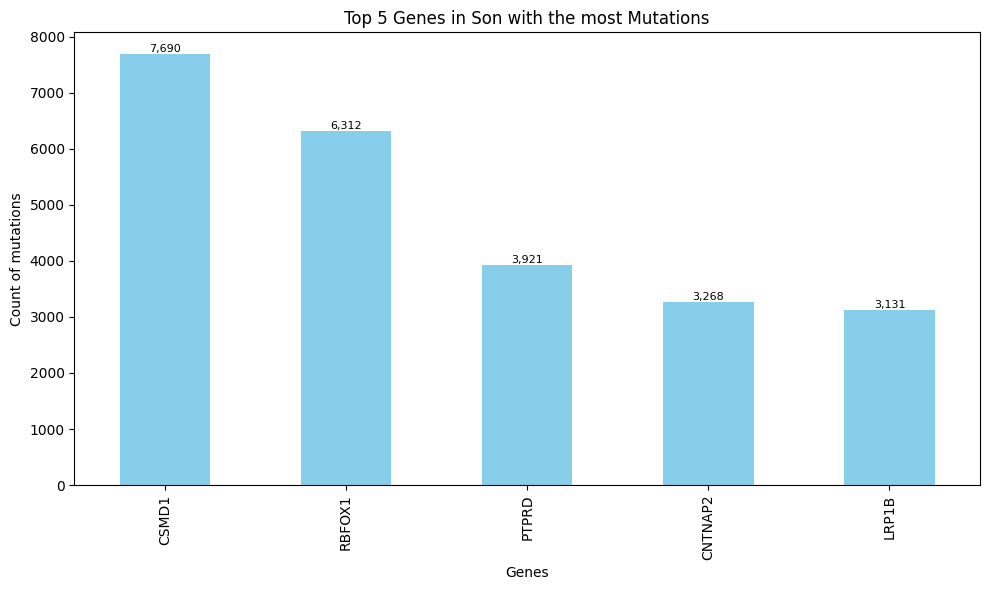

In [ ]:
##Interesting element of data
# Sample DataFrames
son_genes_df = son_df['HUGO'].value_counts()

# Filter out genes labeled as "unknown"
son_genes_df_filtered = son_genes_df[son_genes_df.index != 'unknown']

# Select top 5 elements
top_5 = son_genes_df_filtered.iloc[1:6]

# Plotting
plt.figure(figsize=(10, 6))
bars = top_5.plot(kind='bar', color='skyblue')

# Adding value counts to the bars
for i, count in enumerate(top_5):
    bars.text(i, count + 0.1, '{:,.0f}'.format(count), ha='center', va='bottom', fontsize=8)

# Adding labels and title
plt.xlabel('Genes')
plt.ylabel('Count of mutations')
plt.title('Top 5 Genes in Son with the most Mutations')

# Show plot
plt.tight_layout()
plt.show()

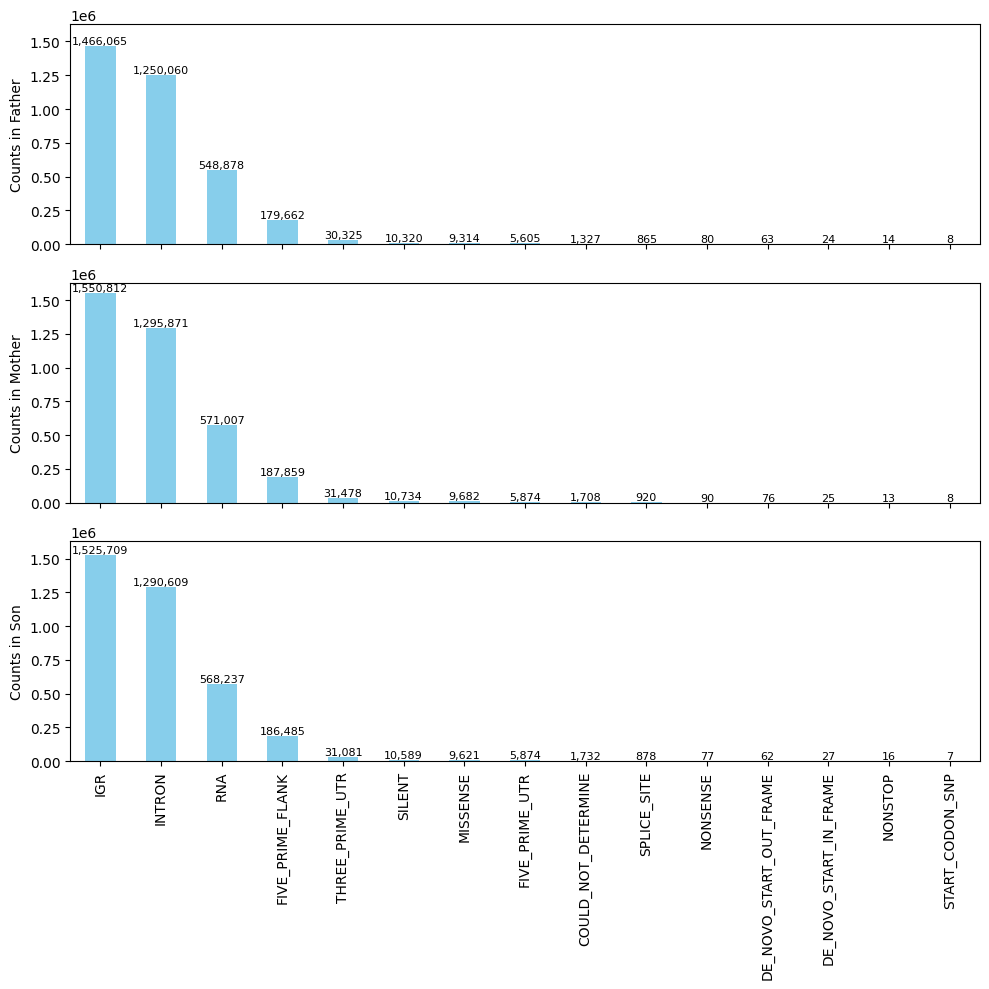

In [ ]:
# Sample DataFrames
father_class_df = father_df['CLASSIFICATION'].value_counts()
mother_class_df = mother_df['CLASSIFICATION'].value_counts()
son_class_df = son_df['CLASSIFICATION'].value_counts()

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True, sharey=True)  # 3 rows, 1 column, share x and y axes

# Plot for father
bars = father_class_df.plot(kind='bar', color='skyblue', ax=axs[0])

# Adds value counts to the bars
for i, count in enumerate(father_class_df):
    bars.text(i, count + 0.1, '{:,.0f}'.format(count), ha='center', va='bottom', fontsize=8)

# Plot for mother
bars = mother_class_df.plot(kind='bar', color='skyblue', ax=axs[1])

# Adds value counts to the bars
for i, count in enumerate(mother_class_df):
    bars.text(i, count + 0.1, '{:,.0f}'.format(count), ha='center', va='bottom', fontsize=8)

# Plot for son
bars = son_class_df.plot(kind='bar', color='skyblue', ax=axs[2])

# Adds value counts to the bars
for i, count in enumerate(son_class_df):
    bars.text(i, count + 0.1, '{:,.0f}'.format(count), ha='center', va='bottom', fontsize=8)


axs[0].set_ylabel('Counts in Father')
axs[1].set_ylabel('Counts in Mother')
axs[2].set_ylabel('Counts in Son')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

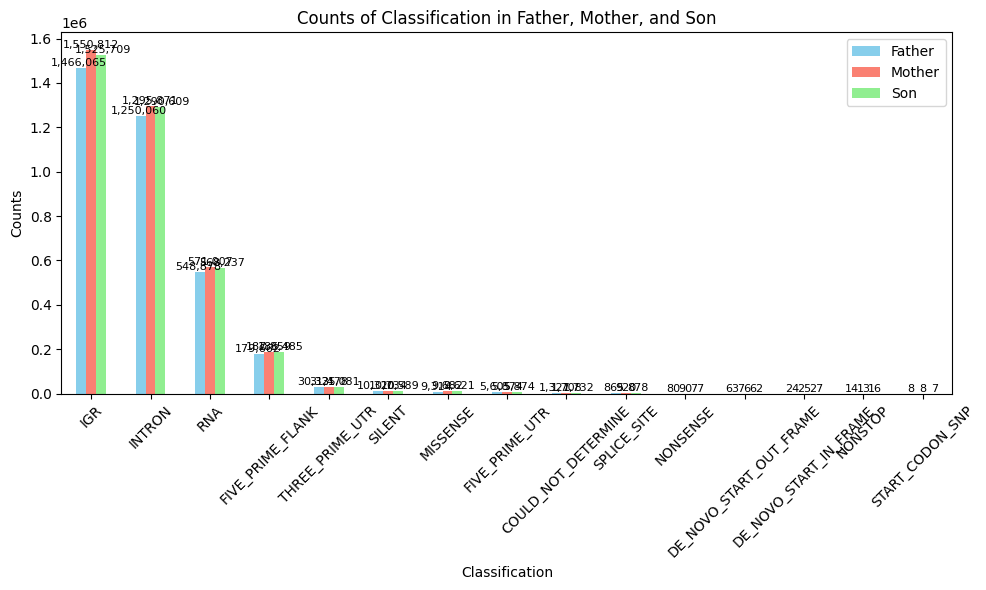

In [ ]:
# Sample DataFrames
import matplotlib.pyplot as plt


father_class_df = father_df['CLASSIFICATION'].value_counts()
mother_class_df = mother_df['CLASSIFICATION'].value_counts()
son_class_df = son_df['CLASSIFICATION'].value_counts()

# Concatenate the dataframes
combined_df = pandas.concat([father_class_df, mother_class_df, son_class_df], axis=1)
combined_df.columns = ['Father', 'Mother', 'Son']

# Plot combined data
fig, ax = plt.subplots(figsize=(10, 6))
combined_df.plot(kind='bar', ax=ax, color=['skyblue', 'salmon', 'lightgreen'])

# Add value counts to the bars
for i, col in enumerate(combined_df.columns):
    for j, count in enumerate(combined_df[col]):
        ax.text(j + i * 0.2 - 0.2, count + 0.1, '{:,.0f}'.format(count), ha='center', va='bottom', fontsize=8)

ax.set_ylabel('Counts')
ax.set_xlabel('Classification')
plt.xticks(rotation=45)
plt.title('Counts of Classification in Father, Mother, and Son')
plt.tight_layout()
plt.show()